<h1 style="text-align:center;">Análise de Risco de Ataque Cardíaco com Base em Dados Clínicos</h1>


**Definição do problema**: O problema consiste em prever o risco de ocorrência de um ataque cardíaco com base em informações clínicas e de saúde dos pacientes. O objetivo é identificar os fatores de risco mais relevantes e desenvolver um modelo de machine learning capaz de classificar os pacientes em duas categorias: "menos chance de ataque cardíaco" (target=0) e "mais chance de ataque cardíaco" (target=1).

**Objetivo da análise**: O objetivo principal da análise é criar um modelo de classificação que utilize os atributos fornecidos, como idade, sexo, presença de angina induzida por exercício, número de vasos principais, tipo de dor no peito, pressão arterial em repouso, nível de colesterol, glicose em jejum, resultados eletrocardiográficos em repouso e frequência cardíaca máxima atingida, para prever o risco de ataque cardíaco. Isso pode ser útil para identificar pacientes com maior probabilidade de desenvolver problemas cardíacos, permitindo uma intervenção médica precoce e personalizada. Além disso, a análise pode revelar insights sobre quais fatores são mais influentes na determinação do risco de ataque cardíaco.






### Sobre o conjunto de Dados:

**Age (Idade)**: Esta coluna representa a idade do paciente em anos. A idade é um fator importante na avaliação do risco de doenças cardíacas, pois o risco tende a aumentar com o envelhecimento.

**Sex (Sexo)**: Nesta coluna, o sexo do paciente é codificado, onde "1" geralmente representa sexo masculino e "0" representa sexo feminino. O sexo pode ser um fator de risco, pois as doenças cardíacas podem afetar homens e mulheres de maneira diferente.

**exang (Angina Induzida por Exercício)**: Esta coluna indica se o paciente experimentou angina induzida por exercício. "1" significa que o paciente teve angina durante o exercício, enquanto "0" significa que não teve. A angina é uma dor no peito que pode ser um sintoma de problemas cardíacos.

**ca (Número de Vasos Principais)**: Aqui, o número de vasos sanguíneos principais coloridos por fluoroscopia é registrado. Essa informação fornece insights sobre o grau de obstrução das artérias coronárias.

**cp (Tipo de Dor no Peito)**: Esta coluna descreve o tipo de dor no peito que o paciente experimentou. Os valores incluem:

- 1: Angina típica
- 2: Angina atípica
- 3: Dor não anginal
- 4: Assintomático

**trtbps (Pressão Arterial em Repouso)**: Representa a pressão arterial sistólica em repouso, medida em milímetros de mercúrio (mm Hg). A pressão arterial é um indicador importante da saúde cardiovascular.

**chol (Colesterol)**: Esta coluna indica o nível de colesterol no sangue do paciente, medido em miligramas por decilitro (mg/dl). O colesterol elevado é um fator de risco para doenças cardíacas.

**fbs (Açúcar no Sangue em Jejum)**: Indica se o paciente tem níveis de açúcar no sangue em jejum acima de 120 mg/dl. "1" significa que o açúcar no sangue está elevado, e "0" significa que está dentro do intervalo normal.

**rest_ecg (Resultados Eletrocardiográficos em Repouso)**: Esta coluna descreve os resultados do eletrocardiograma em repouso, com os seguintes valores:

- 0: Normal
- 1: Anormalidade de onda ST-T (inversões de onda T e/ou elevação ou depressão do segmento ST > 0,05 mV)
- 2: Provável ou definitiva hipertrofia ventricular esquerda por critérios de Estes

**thalach (Frequência Cardíaca Máxima Atingida)**: Indica a frequência cardíaca máxima atingida pelo paciente durante o teste. A frequência cardíaca é um importante indicador de aptidão cardiovascular.

**target (Alvo)**: Esta coluna é o alvo da análise e representa a variável de resposta. "0" indica que o paciente tem "menos chance de ataque cardíaco", enquanto "1" indica "mais chance de ataque cardíaco". O objetivo da análise é prever esta variável com base nas outras informações do dataset.

Este conjunto de dados é valioso para a análise de risco de ataque cardíaco, permitindo que os profissionais de saúde e os cientistas de dados explorem as relações entre esses atributos clínicos e a probabilidade de ocorrência de ataques cardíacos, contribuindo para a prevenção e o tratamento adequado de doenças cardiovasculares.






In [1]:
# Importando os pacote para leitura e manipulação:
import pandas as pd
import numpy as np

In [2]:
# Fazendo a leitura do dataset
df = pd.read_csv('heart.csv')
# o2saturation = pd.read_csv('DATASETS/o2Saturation.csv')

In [3]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

A função `describe()` no Jupyter Notebook é comumente usada para obter estatísticas descritivas resumidas das colunas numéricas de um conjunto de dados. Com base nas informações das colunas fornecidas anteriormente, ao aplicar a função `describe()` a este conjunto de dados, você poderá obter as seguintes informações resumidas para as colunas numéricas:

1. **Age (Idade):**
   - Contagem de valores não nulos
   - Média de idade
   - Desvio padrão da idade
   - Valor mínimo da idade
   - Primeiro quartil (25%)
   - Mediana (50%)
   - Terceiro quartil (75%)
   - Valor máximo da idade

2. **trtbps (Pressão Arterial em Repouso):**
   - Contagem de valores não nulos
   - Média da pressão arterial em repouso
   - Desvio padrão da pressão arterial em repouso
   - Valor mínimo da pressão arterial em repouso
   - Primeiro quartil (25%)
   - Mediana (50%)
   - Terceiro quartil (75%)
   - Valor máximo da pressão arterial em repouso

3. **chol (Colesterol):**
   - Contagem de valores não nulos
   - Média do nível de colesterol
   - Desvio padrão do nível de colesterol
   - Valor mínimo do nível de colesterol
   - Primeiro quartil (25%)
   - Mediana (50%)
   - Terceiro quartil (75%)
   - Valor máximo do nível de colesterol

4. **thalach (Frequência Cardíaca Máxima Atingida):**
   - Contagem de valores não nulos
   - Média da frequência cardíaca máxima atingida
   - Desvio padrão da frequência cardíaca máxima atingida
   - Valor mínimo da frequência cardíaca máxima atingida
   - Primeiro quartil (25%)
   - Mediana (50%)
   - Terceiro quartil (75%)
   - Valor máximo da frequência cardíaca máxima atingida

Essas estatísticas resumidas ajudarão a ter uma compreensão inicial das distribuições das variáveis numéricas, identificando tendências centrais, dispersões e possíveis valores discrepantes nos dados. Isso é útil para a análise exploratória de dados e para entender melhor a natureza das informações contidas no conjunto de dados.

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Quando você executa o código `df.isna().sum()`, está contando o número de valores ausentes (NaN, Not a Number) em cada coluna do DataFrame `df`. Se o resultado é 0 para todas as colunas, isso significa que não há valores ausentes em nenhum dos atributos do conjunto de dados.

Isso é uma boa notícia, pois a ausência de valores faltantes simplifica a análise de dados, tornando mais fácil trabalhar com o conjunto de dados, pois você não precisa lidar com a imputação de dados ausentes ou tomar medidas para tratá-los. Você pode prosseguir com análises e modelagem diretamente com os dados completos e disponíveis em todas as colunas.

In [7]:
df.duplicated().sum()

1

Ao obter o valor 1 como resultado de `df.duplicated().sum()`, isso significa que há uma única linha no DataFrame `df` que é uma duplicata da linha anterior. Em outras palavras, há uma única instância onde os dados de uma linha são idênticos aos da linha imediatamente anterior no DataFrame.

In [8]:
# Excluindo a linha duplicada
df.drop_duplicates(inplace=True)

In [9]:
# Verificando se está tudo de acordo com o dataset
df.duplicated().sum()

0

In [10]:
# Agora vamos usar a função nunique para calcular o número de valores únicos (distintos)
#em uma série ou coluna de um DataFrame
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

A partir dos resultados de `nunique` para cada coluna, podemos tirar algumas conclusões iniciais sobre o conjunto de dados:

1. **Age (Idade):** Existem 41 idades únicas no conjunto de dados. Isso indica que há uma diversidade razoável nas idades dos pacientes incluídos no conjunto de dados.

2. **Sex (Sexo):** Há apenas 2 valores únicos nesta coluna, o que indica que o conjunto de dados inclui predominantemente duas categorias de sexo.

3. **cp (Tipo de Dor no Peito):** Existem 4 tipos únicos de dor no peito relatados. Isso sugere uma variação na descrição da dor no peito entre os pacientes.

4. **trtbps (Pressão Arterial em Repouso):** Há 49 valores únicos na coluna de pressão arterial em repouso, indicando uma certa diversidade nas leituras de pressão arterial.

5. **chol (Colesterol):** Há 152 valores únicos para o nível de colesterol, o que indica uma ampla variação nos níveis de colesterol entre os pacientes.

6. **fbs (Açúcar no Sangue em Jejum):** Existem apenas 2 valores únicos nesta coluna, indicando que a maioria dos pacientes se enquadra em duas categorias distintas em relação ao açúcar no sangue em jejum (acima e abaixo de 120 mg/dl).

7. **restecg (Resultados Eletrocardiográficos em Repouso):** Há 3 valores únicos para os resultados do eletrocardiograma em repouso, sugerindo diferentes interpretações dos resultados.

8. **thalachh (Frequência Cardíaca Máxima Atingida):** Existem 91 valores únicos para a frequência cardíaca máxima atingida, indicando uma variação considerável nas frequências cardíacas dos pacientes.

9. **exng (Angina Induzida por Exercício):** Há apenas 2 valores únicos nesta coluna, o que sugere que a maioria dos pacientes é classificada como tendo ou não tendo angina induzida por exercício.

10. **oldpeak:** Existem 40 valores únicos na coluna de oldpeak, indicando uma variação na medida da depressão do segmento ST induzida pelo exercício.

11. **slp:** Há 3 valores únicos na coluna slp, sugerindo diferentes tipos de inclinação do segmento ST durante o exercício.

12. **caa (Número de Vasos Principais):** Existem 5 valores únicos para o número de vasos principais, indicando uma diversidade considerável na condição das artérias coronárias.

13. **thall:** Existem 4 valores únicos na coluna thall, sugerindo diferentes interpretações de um critério específico.

14. **output:** Há apenas 2 valores únicos na coluna de saída (target), o que indica que o problema de classificação se resume a duas categorias: "menos chance de ataque cardíaco" e "mais chance de ataque cardíaco".

Essas conclusões iniciais fornecem insights sobre a diversidade e distribuição dos dados em cada coluna, o que pode ser útil na análise exploratória de dados e na seleção de métodos de modelagem adequados para este conjunto de dados.

<h2 style="text-align:center;">Exploração de Dados (Análise Exploratória)</h2>

Agora iremos analisar e explorar os dados para entender sua natureza. Visualizaremos os dados, calcularemos estatísticas descritivas e identificaremos padrões, tendências e possíveis outliers

A análise exploratória de dados desempenha um papel essencial na exploração de conjuntos de dados, pois oferece a oportunidade de aprofundar o entendimento dos dados, descobrir padrões ocultos, identificar pontos atípicos e revelar insights iniciais. Ao conduzir uma análise exploratória, os analistas podem obter uma visão mais clara das informações contidas no conjunto de dados, o que, por sua vez, ajuda a formular questões mais específicas e direcionadas para análises subsequentes. Essa etapa é fundamental para orientar a estratégia de análise e alcançar os objetivos relacionados aos dados, seja na identificação de oportunidades de negócios, na detecção de problemas potenciais ou na tomada de decisões informadas. Além disso, a utilização de gráficos desempenha um papel crucial na análise exploratória, pois essas representações visuais facilitam a interpretação dos dados e a comunicação de resultados a uma audiência diversificada, tornando a análise de dados mais acessível e eficaz. Os gráficos são ferramentas valiosas que simplificam conceitos complexos, permitindo que as informações sejam transmitidas de forma mais compreensível e impactante. Portanto, ao realizar a análise exploratória de dados, os analistas utilizam gráficos como uma maneira poderosa de visualizar e apresentar os insights que emergem da exploração do conjunto de dados.

<h2 style="text-align:center;">Exploração de Dados Individuais</h2>

Iniciaremos agora a análise exploratória de dados de forma individualizada, examinando cada atributo ou coluna do conjunto de dados separadamente. Essa abordagem é fundamental para compreender profundamente cada variável e sua contribuição para o conjunto de dados como um todo.

A análise individual de cada atributo é importante por diversas razões:

1. **Compreensão Detalhada:** Ao analisar cada variável separadamente, podemos adquirir um conhecimento mais profundo sobre suas características, distribuição e variações. Isso nos permite identificar padrões específicos e compreender como cada atributo se comporta.

2. **Detecção de Anomalias:** A análise individual nos ajuda a identificar valores atípicos ou discrepantes em cada variável. Essas anomalias podem ser indicativos de erros de medição, problemas nos dados ou até mesmo informações valiosas sobre casos excepcionais.

3. **Seleção de Recursos:** Durante a análise, podemos avaliar a relevância de cada variável em relação ao nosso objetivo. Isso é especialmente importante ao construir modelos de aprendizado de máquina, onde a seleção adequada de recursos pode melhorar o desempenho do modelo.

4. **Formulação de Hipóteses:** Ao examinar cada atributo individualmente, podemos formular hipóteses sobre como esses atributos podem estar relacionados uns com os outros ou com o resultado desejado. Essas hipóteses podem orientar análises mais avançadas.

5. **Visualização Eficaz:** Ao analisar atributos individualmente, podemos criar visualizações específicas para cada um, destacando características importantes e permitindo uma comunicação mais clara dos resultados.

Portanto, a análise exploratória de dados individualizada desempenha um papel crucial na compreensão profunda de um conjunto de dados, na identificação de insights valiosos e na preparação para análises mais avançadas. É o ponto de partida para qualquer projeto de análise de dados, permitindo que os analistas explorem as informações de forma sistemática e abrangente.

In [11]:
# Para explorar os dados, iremos usar bibliotecas graficas, como matplotlib e seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq

<AxesSubplot:title={'center':'Tabela de Caixa (Boxplot) da Idade dos Pacientes'}, xlabel='age'>

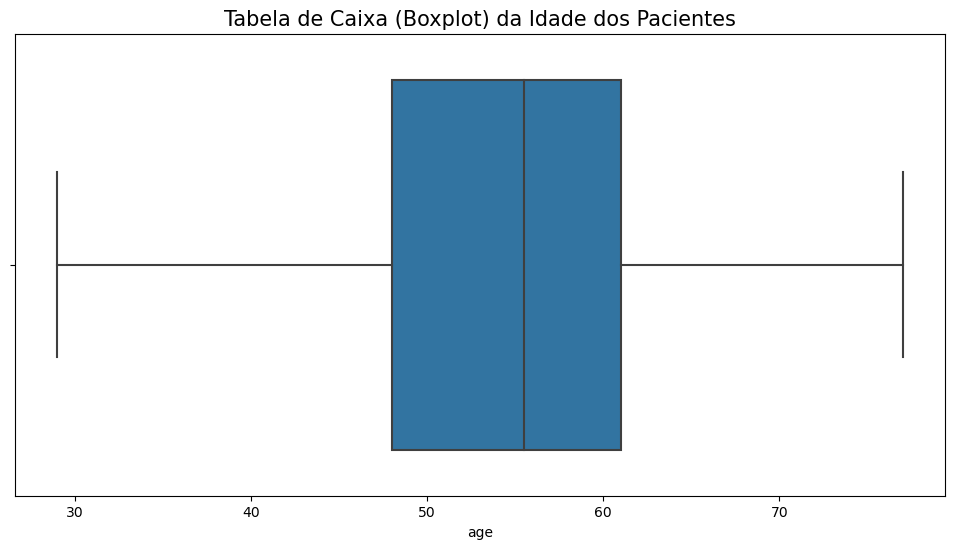

In [12]:
plt.figure(figsize=(12,6))
plt.title('Tabela de Caixa (Boxplot) da Idade dos Pacientes', fontsize = 15)
sns.boxplot(x = df.age)



1. **Tendência Central:** A média de idade é de aproximadamente 54.42 anos, enquanto a mediana (50º percentil) é de 55.5 anos. Isso sugere uma distribuição um pouco assimétrica para a direita, onde a média é ligeiramente menor que a mediana.

2. **Dispersão:** O desvio padrão é de aproximadamente 9.05 anos, indicando uma dispersão moderada em torno da média. Os valores mínimo e máximo são 29 e 77 anos, respectivamente, mostrando que a faixa de idades varia de 29 a 77 anos.

3. **Valores Atípicos:** Não podemos determinar diretamente a presença de valores atípicos com base apenas nas estatísticas do `describe`. Para identificar valores atípicos, um boxplot será mais informativo.

Um boxplot nos ajuda a visualizar a distribuição da idade e a identificar a presença de valores discrepantes (outliers), se houver. Isso é útil para compreender melhor como a idade está distribuída e se existem casos incomuns no conjunto de dados.

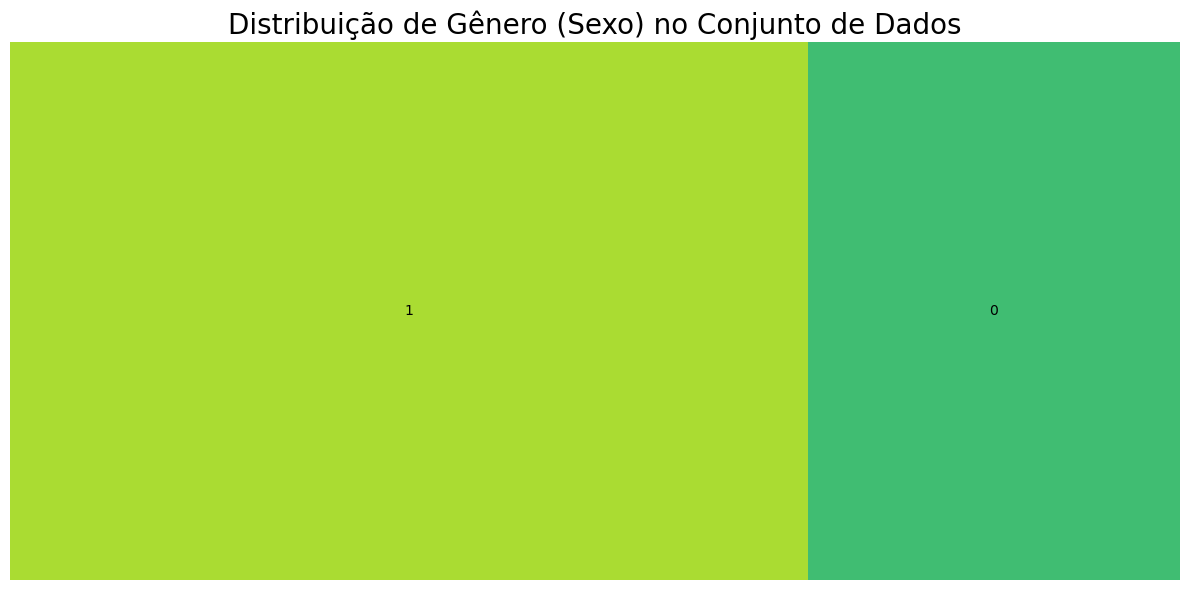

In [13]:
# Definindo o tamanho da figura
plt.figure(figsize= (12,6))

# Criando a figura
sq.plot(sizes=df.sex.value_counts(), label = df.sex.value_counts().index)

# Removendo os eixos
plt.axis('off')

# Adicionando título
plt.title('Distribuição de Gênero (Sexo) no Conjunto de Dados', fontsize = 20)

plt.tight_layout()

Com base no heatmap onde 1 representa o sexo masculino e 0 representa o sexo feminino, podemos tirar as seguintes conclusões preliminares sobre a distribuição de gênero no conjunto de dados:

1. **Proporção de Gênero:** Há um total de 206 entradas associadas ao sexo masculino (1) e 96 entradas associadas ao sexo feminino (0) no conjunto de dados.

2. **Desbalanceamento:** A distribuição de gênero no conjunto de dados parece ser desigual, com um número significativamente maior de entradas associadas ao sexo masculino em comparação com o sexo feminino. Isso sugere um desbalanceamento de gênero no conjunto de dados.

3. **Possíveis Considerações:** O desbalanceamento de gênero pode ter implicações na análise e modelagem de dados, especialmente se o gênero for uma variável relevante para os objetivos do projeto. Pode ser necessário tomar medidas para lidar com esse desbalanceamento, como a aplicação de técnicas de balanceamento de dados, dependendo da natureza do problema.

É importante notar que essas são conclusões iniciais com base nos números fornecidos. A análise mais aprofundada pode ser necessária para entender completamente o impacto do gênero nos resultados da análise de dados clínicos.

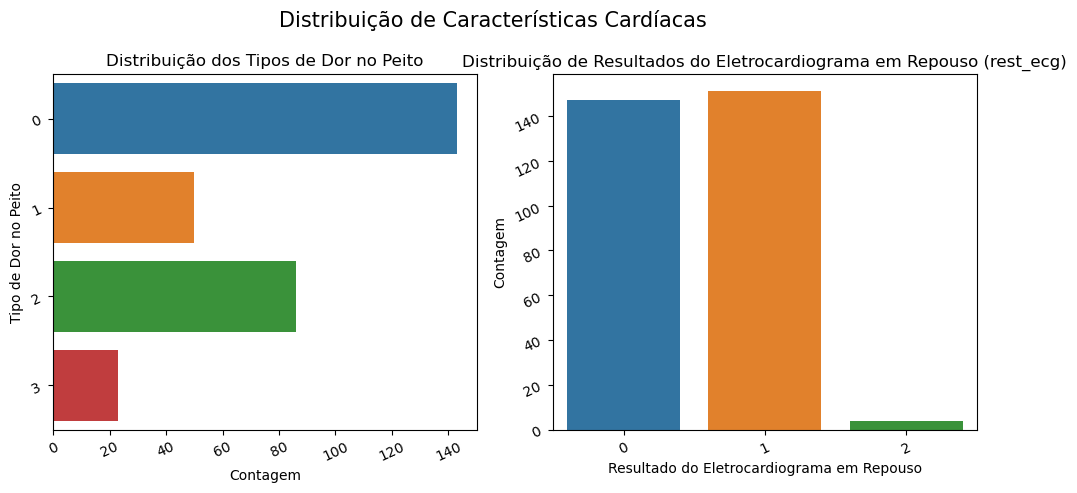

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Distribuição de Características Cardíacas', fontsize=15)

# Título para o primeiro gráfico (ax[0])
ax[0].set_title('Distribuição dos Tipos de Dor no Peito')
ax[0].tick_params(labelrotation=25)
sns.countplot(y=df.cp, ax=ax[0])

# Defina os rótulos para o primeiro gráfico
ax[0].set_xlabel('Contagem')
ax[0].set_ylabel('Tipo de Dor no Peito')

# Título para o segundo gráfico (ax[1])
ax[1].set_title('Distribuição de Resultados do Eletrocardiograma em Repouso (rest_ecg)')
ax[1].tick_params(labelrotation=25)
sns.countplot(x=df.restecg, ax=ax[1])

# Defina os rótulos para o segundo gráfico
ax[1].set_xlabel('Resultado do Eletrocardiograma em Repouso')
ax[1].set_ylabel('Contagem')

fig.tight_layout(pad=1.2)


A análise do resultado do gráfico de barras para a coluna "cp" (tipo de dor no peito) fornece informações importantes sobre a distribuição das categorias de dor no peito no conjunto de dados. Aqui estão algumas informações técnicas e insights que podemos obter com base nesses números:

1. **Distribuição de Tipos de Dor:** A coluna "cp" possui quatro categorias diferentes que representam diferentes tipos de dor no peito. A distribuição das categorias é a seguinte:
   - Angina Típica (Valor 0): 143 ocorrências.
   - Angina Atípica (Valor 1): 50 ocorrências.
   - Dor Não Anginal (Valor 2): 86 ocorrências.
   - Assintomático (Valor 3): 23 ocorrências.

2. **Frequência Relativa:** Podemos calcular a frequência relativa de cada tipo de dor dividindo o número de ocorrências pelo total de ocorrências no conjunto de dados. Isso nos dá uma ideia da proporção de cada tipo de dor em relação ao todo.

3. **Dor Mais Comum:** A dor mais comum entre os pacientes no conjunto de dados é a "Angina Típica" (Valor 0), com 143 ocorrências.

4. **Dor Menos Comum:** A dor menos comum é a "Assintomática" (Valor 3), com apenas 23 ocorrências.

5. **Variedade de Sintomas:** A presença de múltiplos tipos de dor no peito indica uma variedade de sintomas entre os pacientes do conjunto de dados. Isso pode ser importante para entender como diferentes tipos de dor no peito estão relacionados a outros fatores clínicos e ao resultado de interesse (a presença ou não de risco de ataque cardíaco).

6. **Potencial Relacionamento:** Esses números também podem ser usados em análises subsequentes para investigar se há algum relacionamento entre o tipo de dor no peito e a presença de risco de ataque cardíaco (variável alvo).

Essas informações podem orientar análises mais avançadas e ajudar na compreensão de como os diferentes tipos de dor no peito estão distribuídos no conjunto de dados clínicos.

Com base nos resultados do segundo gráfico, que descreve os resultados do eletrocardiograma em repouso (rest_ecg), podemos tirar as seguintes conclusões e insights:

1. **Normalidade predominante:** A maioria dos registros mostra resultados de ECG em repouso classificados como "Normal" (valor 0).

2. **Anormalidades de onda ST-T:** Acima do valor 0 apresentam anormalidades de onda ST-T no ECG em repouso (valor 1). Essas anormalidades podem indicar problemas cardíacos.

3. **Hipertrofia ventricular esquerda:** Um número muito pequeno de registros indica uma possível ou definitiva hipertrofia ventricular esquerda com base nos critérios de Estes (valor 2).

4. **Variação nas leituras:** A presença de três categorias diferentes indica que há variação nos resultados do ECG em repouso dentro do conjunto de dados.

5. **Possíveis problemas cardíacos:** A alta quantidade de registros com anormalidades de onda ST-T (valor 1) sugere que pode haver um número significativo de pacientes com problemas cardíacos no conjunto de dados.

6. **Relevância clínica:** Os resultados anormais do ECG podem ser indicativos de problemas de saúde cardíaca subjacentes que precisam de avaliação médica adicional.

7. **Importância na análise:** Essa coluna pode ser uma característica importante ao realizar análises e modelagem de dados para prever eventos relacionados a problemas cardíacos.

8. **Desequilíbrio de classes:** Há um desequilíbrio significativo entre as categorias "Normal" e "Anormalidade de onda ST-T" (valor 0 vs. valor 1).

9. **Registro raro de hipertrofia:** A presença de apenas 4 registros com hipertrofia ventricular esquerda é um evento raro no conjunto de dados.

10. **Necessidade de avaliação clínica:** A análise desses resultados do ECG em repouso pode ser crítica para identificar pacientes em risco de doenças cardíacas e encaminhá-los para avaliação médica adequada.

Essas conclusões destacam a importância da coluna "rest_ecg" na análise do conjunto de dados e sua relevância potencial na identificação de pacientes com risco de doenças cardíacas.

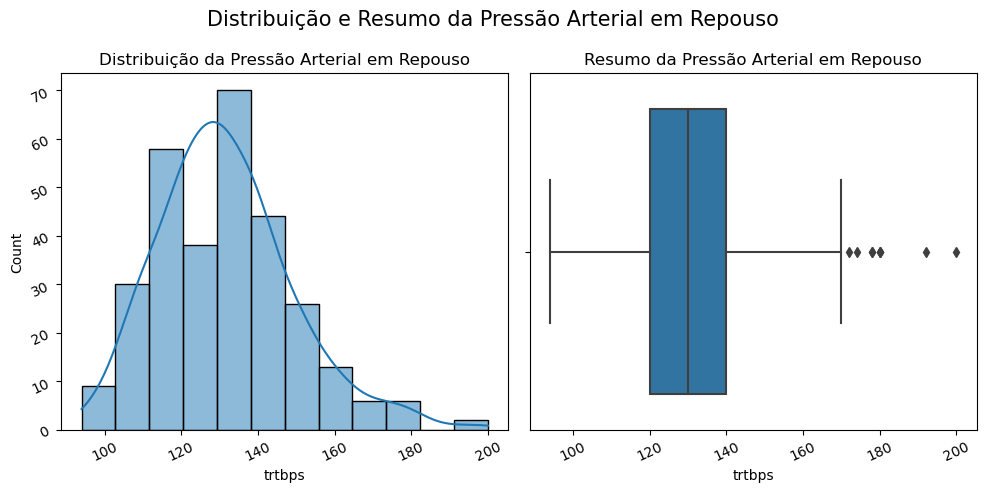

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Distribuição e Resumo da Pressão Arterial em Repouso', fontsize = 15)

# Título para o primeiro gráfico (ax[0])
ax[0].set_title('Distribuição da Pressão Arterial em Repouso')

# Título para o segundo gráfico (ax[1])
ax[1].set_title('Resumo da Pressão Arterial em Repouso')

ax[0].tick_params(labelrotation = 25)
sns.histplot(df.trtbps, bins=12, kde= True,
            ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.boxplot(x = df.trtbps,ax = ax[1])

fig.tight_layout(pad = 1.2)


A análise dos resultados do histograma e do boxplot para a coluna "trtbps" (pressão arterial em repouso) fornece informações sobre a distribuição das leituras de pressão arterial no conjunto de dados. Aqui estão algumas conclusões e insights que podem ser tirados com base nesses números:

1. **Diversidade de Valores:** A coluna "trtbps" possui uma variedade de valores de pressão arterial em repouso. A lista de valores únicos varia de 94 a 200 mm Hg, mostrando uma ampla gama de leituras.

2. **Valores Mais Comuns:** Os valores mais comuns de pressão arterial em repouso parecem ser entre 110 mm Hg à 140 mm Hg, como pode ser visto no histograma, há um crescimento de densidade quando consideramos essa margem de valores. Isso indica que essas leituras são bastante frequentes no conjunto de dados.

3. **Distribuição Assimétrica:** A distribuição dos valores de pressão arterial em repouso parece ser assimétrica, com uma tendência de concentração de valores mais próximos de 110 e 140 mm Hg, e uma cauda alongada de valores mais altos.

4. **Valores Extremos:** Existem alguns valores extremos (outliers) na extremidade direita da distribuição, como 200 mm Hg, que podem indicar casos com pressão arterial significativamente elevada.

Ao criar um histograma com esses dados, você poderá visualizar a forma da distribuição da pressão arterial em repouso de forma mais clara, observar qualquer assimetria e identificar valores extremos. O histograma será útil para entender a concentração de leituras em diferentes intervalos de pressão arterial e para identificar tendências na distribuição dos valores.

Em relação ao Boxplot, quando a pressão arterial em repouso (trtbps) é considerada um outlier em um boxplot, ou seja, quando ela está acima de 170 mm Hg e fora das "whiskers" do boxplot, algumas conclusões e observações podem ser feitas:

1. **Valores Extremos:** Pressões arteriais acima de 170 mm Hg são consideradas valores extremos em relação à distribuição geral dos dados. Isso significa que essas leituras estão muito acima da média ou da mediana da pressão arterial no conjunto de dados.

2. **Possível Importância Clínica:** Valores tão elevados de pressão arterial podem ter importância clínica significativa, uma vez que a hipertensão arterial (pressão arterial alta) é um fator de risco importante para doenças cardiovasculares e outros problemas de saúde. Portanto, esses outliers podem representar indivíduos com hipertensão grave.

3. **Necessidade de Atenção:** A presença de outliers acima de 170 mm Hg sugere que esses indivíduos podem requerer atenção médica especializada e acompanhamento para avaliação e tratamento da hipertensão.

4. **Impacto na Análise:** Quando realizando análises estatísticas ou modelagem de dados, a presença de outliers pode afetar os resultados e os modelos. É importante decidir se esses valores extremos devem ser tratados de forma diferente ou removidos da análise, dependendo dos objetivos da análise.

5. **Variação na População:** A presença de outliers pode indicar uma grande variação na pressão arterial dentro da população estudada. Isso pode ser relevante para estudos clínicos e epidemiológicos, onde a compreensão da distribuição da pressão arterial é importante.

6. **Assimetria:** O fato de o terceiro quartil (Q3) estar mais próximo do valor máximo (200 mm Hg) do que do valor médio sugere uma possível assimetria à direita na distribuição da pressão arterial.


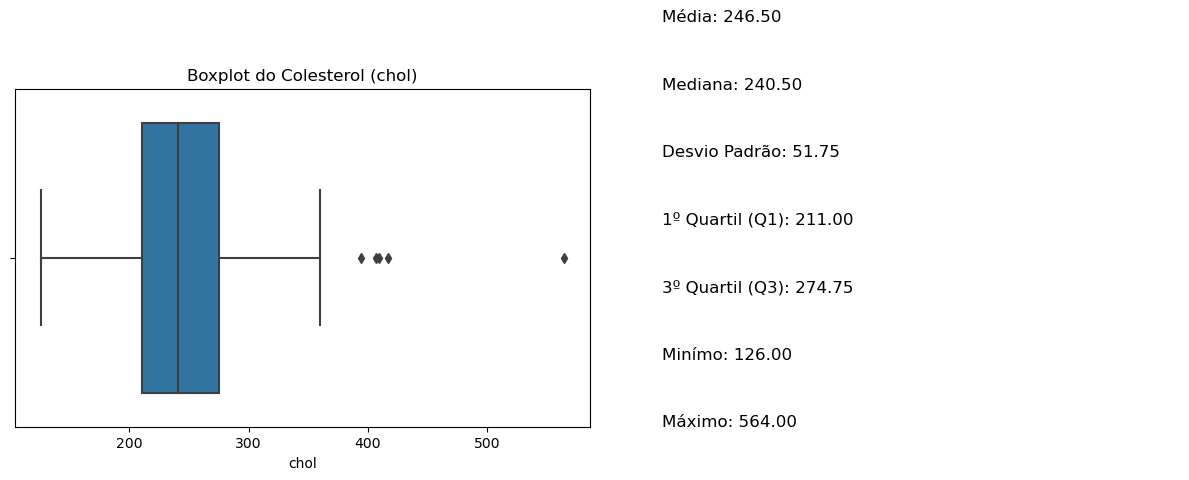

In [16]:
# Calculando as estatísticas relevantes
mean_chol = df['chol'].mean()
median_chol = df['chol'].median()
std_chol = df['chol'].std()
q1_chol = df['chol'].quantile(0.25)
q3_chol = df['chol'].quantile(0.75)
min_chol = df['chol'].min()
max_chol = df['chol'].max()

# Criando um subplot para o boxplot e os cartões de estatísticas:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Configurando o ax1 para o boxplot
sns.boxplot(x=df['chol'], ax=ax1)
ax1.set_title('Boxplot do Colesterol (chol)')

# Configurando o ax2 para os cartões de estatísticas
ax2.axis('off')  # Desliguando os eixos
ax2.text(0.1, 1.2, f'Média: {mean_chol:.2f}', fontsize=12)
ax2.text(0.1, 1.0, f'Mediana: {median_chol:.2f}', fontsize=12)
ax2.text(0.1, 0.8, f'Desvio Padrão: {std_chol:.2f}', fontsize=12)
ax2.text(0.1, 0.6, f'1º Quartil (Q1): {q1_chol:.2f}', fontsize=12)
ax2.text(0.1, 0.4, f'3º Quartil (Q3): {q3_chol:.2f}', fontsize=12)
ax2.text(0.1, 0.2, f'Minímo: {min_chol:.2f}', fontsize=12)
ax2.text(0.1, 0.0, f'Máximo: {max_chol:.2f}', fontsize=12)

plt.tight_layout()
plt.show()

Com base nos resultados do `boxplot` e algumas estatísticas da coluna "chol" (colesterol), podemos tirar as seguintes conclusões e insights ao criar um boxplot:

1. **Tendência Central:** A mediana (50º percentil) do nível de colesterol é de 240.5 mg/dl, o que indica que metade das leituras está abaixo desse valor e metade está acima. Isso é representado pela linha mediana no boxplot.

2. **Dispersão:** O intervalo interquartil (IQR), que vai do 25º percentil (Q1) ao 75º percentil (Q3), é de 63.75 mg/dl (274.75 - 211). Isso indica a dispersão dos valores do segundo ao terceiro quartil e é representado pela caixa central no boxplot.

In [17]:
df.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

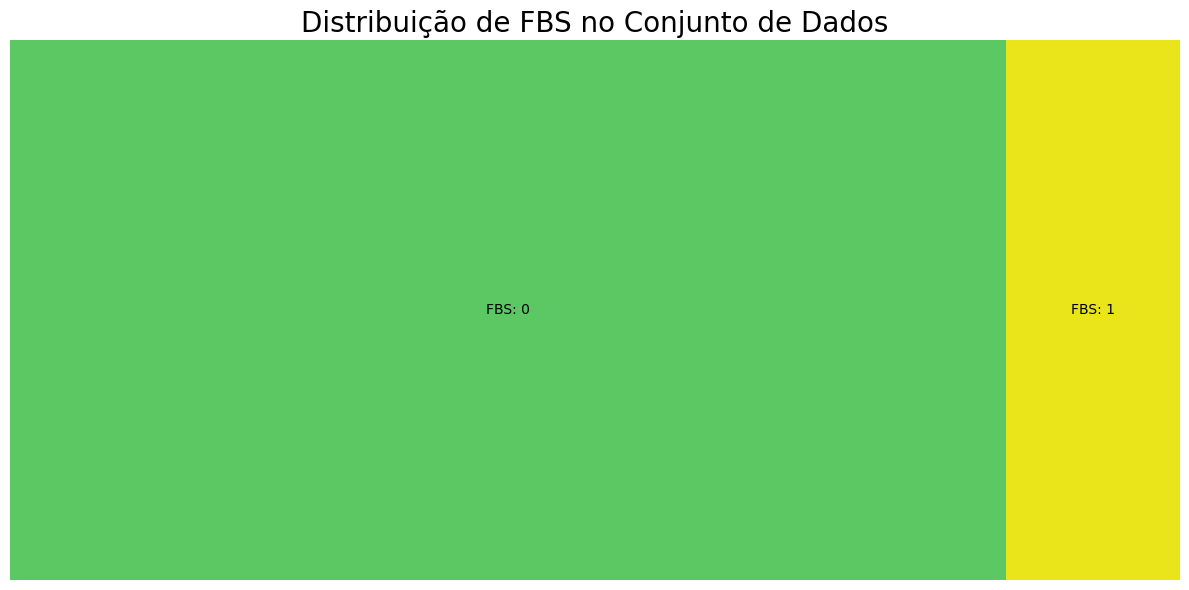

In [21]:
# Definindo os dados para "fbs" e suas contagens
fbs_counts = df['fbs'].value_counts()
labels = [f'FBS: {value}' for value in fbs_counts.index]
sizes = fbs_counts.values

# Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

# Criando a figura com squarify
sq.plot(sizes=sizes, label=labels,)

# Removendo os eixos
plt.axis('off')

# Adicionando título
plt.title('Distribuição de FBS no Conjunto de Dados', fontsize=20)

plt.tight_layout()
plt.show()


Com base no resultado de `df.fbs.value_counts()`, onde "fasting blood sugar > 120 mg/dl" é representado como 1 (verdadeiro) e 0 (falso), podemos tirar as seguintes informações:

1. **Desbalanceamento:** Existe uma esmagadora quantidade de amostras onde o valor de "fasting blood sugar" é 0 (falso), enquanto há pouquíssimas amostras têm o valor 1 (verdadeiro). Isso indica um desbalanceamento significativo entre as duas classes.

2. **Maioria sem FBS Elevado:** A maioria dos pacientes no conjunto de dados tem um nível de "fasting blood sugar" abaixo de 120 mg/dl.

3. **Minoria com FBS Elevado:** Um grupo menor de pacientes tem um nível de "fasting blood sugar" acima de 120 mg/dl, o que pode indicar uma condição médica de preocupação, como hiperglicemia em jejum.

4. **Importância na Análise:** Quando fomos realizar análises ou modelagem de dados, é importante considerar o desbalanceamento entre as classes, especialmente se estiver desenvolvendo um modelo de machine learning para prever algum resultado com base em "fasting blood sugar". É possível que a classe minoritária (1 = verdadeiro) seja mais relevante para o seu problema, e técnicas de balanceamento de dados podem ser necessárias.


In [22]:
df.restecg.value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64